<a href="https://colab.research.google.com/github/rahiakela/math-for-programmers/blob/main/3-ascending-to-3d-world/2_vector_arithmetic_in_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector arithmetic in 3D

In the 2D plane, we worked with three interchangeable mental models of a vector:
coordinate pairs, arrows of fixed length and direction, and points positioned relative to the origin.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/2d-plane.png?raw=1' width='800'/>

We can interpret a 3D vector in similar ways. Instead of viewing a rectangular portion of the plane, we start with a finite box of 3D space. Such a
3D box, has a finite height, width, and depth. In 3D, we keep the notions of x and y directions, and we add a z direction with which to measure the depth.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-plane.png?raw=1' width='800'/>

Arrows and points work as mental models for vectors in 3D just like in 2D, and we can measure them similarly with coordinates.



## Setup

In [1]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/vectors.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/colors.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/draw2d.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/draw3d.py

--2021-01-15 11:51:48--  https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/vectors.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1682 (1.6K) [text/plain]
Saving to: ‘vectors.py’

vectors.py          100%[===================>]   1.64K  --.-KB/s    in 0s      

2021-01-15 11:51:48 (17.7 MB/s) - ‘vectors.py’ saved [1682/1682]

--2021-01-15 11:51:48--  https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/colors.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [2]:
from draw3d import *
from vectors import *

%load_ext autoreload
%autoreload 2

## Adding 3D vectors

In 3D, vector addition can still be accomplished by adding coordinates. The vectors `(2, 1, 1)` and `(1, 2, 2)` sum to `(2 + 1, 1 + 2, 1 + 2) = (3, 3, 3)`. We can start at the origin and place the two input vectors tip-to-tail in either order to get to the sum point `(3, 3, 3)`.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-vec-add.png?raw=1' width='800'/>

In [3]:
v1 = [2, 1, 1]
v2 = [1, 2, 2]
v3 = add(*(v1, v2))

In [4]:
v3

(3, 3, 3)

In [5]:
v1 = [1, 2, 2]
v2 = [2, 1, 1]
v3 = add(*(v1, v2))
v3

(3, 3, 3)

As in 2D, we can add any number of 3D vectors together by summing all of their
x-coordinates, all of their y-coordinates, and all of their z-coordinates. These three sums give us the coordinates of the new vector. 

For instance, in the sum `(1, 1, 3) + (2, 4, –4) + (4, 2, –2)`, the respective x-coordinates are 1, 2, and 4, which sum to 7. The y-coordinates sum to 7 as well, and the z-coordinates sum to –3; therefore, the vector sum is `(7, 7, –3)`.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-vec-adding.png?raw=1' width='800'/>

In Python, we can write a concise function to sum any number of input vectors, and that works in two or three dimensions.

In [6]:
def add(*vectors):
  by_coordinate = zip(*vectors)
  coordinate_sums = [sum(coords) for coords in by_coordinate]

  return tuple(coordinate_sums)

Let’s break it down. Calling Python’s zip function on the input vectors extracts their x-coordinates, y-coordinates, and z-coordinates.

In [7]:
list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

If we apply Python’s sum function to each of the grouped coordinates, we get the sums of x, y, and z values, respectively:

In [8]:
[sum(coords) for coords in [(1,2,4),(1,4,2),(3,-4,-2)]]

[7, 7, -3]

Finally, for consistency, we convert this from a list to a tuple because we’ve represented all of our vectors as tuples to this point. The result is the tuple (7, 7, 3). We could also have written the add function as the following one-liner.

In [9]:
def add(*vectors):
  return tuple(map(sum, zip(*vectors)))

In [10]:
add(*[(1,1,3),(2,4,-4),(4,2,-2)])

(7, 7, -3)

##Scalar multiplication in 3D

To multiply a 3D vector by a scalar, we multiply all of its components by the scalar factor.

For example, the vector (1, 2, 3) multiplied by the scalar 2 gives us (2, 4, 6). This resulting vector is twice as long but points in the same direction as in the 2D case. Like v = (1, 2, 3) and its scalar multiple 2 · v = (2, 4, 6).

In [12]:
v1 = [1, 2, 3]
v2 = scale(2, v1)
v2

(2, 4, 6)

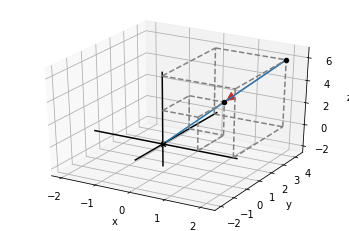

In [15]:
draw3d(
    Points3D((1, 2, 3), (2, 4, 6)),
    Arrow3D((1, 2, 3), (2, 4, 6)),
    Segment3D((0, 0, 0), (2, 4, 6)),
    Box3D(1, 2, 3),
    Box3D(2, 4, 6)
    )

## Exercises

**Ex-3.1**: Draw the 3D arrow and point representing the coordinates
(–1, –2, 2) as well as the dashed box that makes the arrow look 3D. Do this drawing by hand for practice, but from now on, we’ll use Python to draw for us.

In [ ]:
draw3d(
    Points3D((-1, -2, 2)),
    Arrow3D((-1, -2, 2)),
    Segment3D((0, 0, 0), (-1, -2, 2)),
    Box3D(-1, -2, 2)
    )

**Ex-3.2**: There are exactly eight 3D vectors whose coordinates
are all either +1 or –1. For instance, (1, –1, 1) is one of these. Plot all of
these eight vectors as points. Then figure out how to connect them with line segments using Segment3D objects to form the outline of a cube.

**Hint** - You’ll need 12 segments in total.

**Solution** - Because there are only 8 vertices and 12 edges, it’s not too tedious to list them all, but I decided to enumerate them with a list comprehension. For the vertices, I let x, y, and z range over the list of two possible values [1,–1] and collected the eight results. For the edges, I grouped them into three sets of four that point in each coordinate direction. For instance, there are four edges that go from x = –1 to x = 1, while their y- and z-coordinates are the same at both endpoints:

In [ ]:
pm1 = [1, -1]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1, y, z), (1, y, z)) for y in pm1 for z in pm1] +\
        [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1] +\
        [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]

draw3d(
    Points3D(*vertices, color=blue),
    *[Segment3D(*edge) for edge in edges]
)